**Introduction**:  Analyzing data of video games and consoless from my school period. 
The three questions I choose to dive deeper into the stats of our heated discussion are:
1. What was the most popular console and which games were played the most during our school years?
2. What genre of games earns the most revenue? Which Publisher made the most games, and what is the distribution? 
3. How have gaming trends changed from my elementary school days compared to my high school days?


In [ ]:
from google.colab import files
uploaded = files.upload()

In [93]:
import numpy as np
import pandas as pd

In [161]:
data = pd.read_csv('vgsales.csv')
frame = pd.DataFrame(data)
print(frame)

        Rank  ... Global_Sales
0          1  ...        82.74
1          2  ...        40.24
2          3  ...        35.82
3          4  ...        33.00
4          5  ...        31.37
...      ...  ...          ...
16593  16596  ...         0.01
16594  16597  ...         0.01
16595  16598  ...         0.01
16596  16599  ...         0.01
16597  16600  ...         0.01

[16598 rows x 11 columns]


In [162]:
frame = frame.set_index(['Name'])
print(frame)

                                                   Rank  ... Global_Sales
Name                                                     ...             
Wii Sports                                            1  ...        82.74
Super Mario Bros.                                     2  ...        40.24
Mario Kart Wii                                        3  ...        35.82
Wii Sports Resort                                     4  ...        33.00
Pokemon Red/Pokemon Blue                              5  ...        31.37
...                                                 ...  ...          ...
Woody Woodpecker in Crazy Castle 5                16596  ...         0.01
Men in Black II: Alien Escape                     16597  ...         0.01
SCORE International Baja 1000: The Official Game  16598  ...         0.01
Know How 2                                        16599  ...         0.01
Spirits & Spells                                  16600  ...         0.01

[16598 rows x 10 columns]


In [163]:
#Cutting Data for years after 2009 (year I started boarding school)
frameNew = frame[frame['Year']>=2009] 

#decided to cut out 2017 as well as there was only data for January makking it skewed
frameNew1= frameNew[frameNew['Year']<=2016]
print(frameNew1)


                                                     Rank  ... Global_Sales
Name                                                       ...             
Wii Sports Resort                                       4  ...        33.00
New Super Mario Bros. Wii                               9  ...        28.62
Wii Fit Plus                                           15  ...        22.00
Kinect Adventures!                                     16  ...        21.82
Grand Theft Auto V                                     17  ...        21.40
...                                                   ...  ...          ...
Breach                                              16588  ...         0.01
Secret Files 2: Puritas Cordis                      16589  ...         0.01
Mezase!! Tsuri Master DS                            16590  ...         0.01
Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shirub...  16592  ...         0.01
Know How 2                                          16599  ...         0.01

[6572 rows 

In [164]:
#cleaning Nulls
#frameNew1.dropna(axis = 0, how = 'any', inplace = True)

In [165]:
#deleting rank because we will not be using it
del frameNew1 ['Rank']
print(frameNew1)



                                                   Platform  ...  Global_Sales
Name                                                         ...              
Wii Sports Resort                                       Wii  ...         33.00
New Super Mario Bros. Wii                               Wii  ...         28.62
Wii Fit Plus                                            Wii  ...         22.00
Kinect Adventures!                                     X360  ...         21.82
Grand Theft Auto V                                      PS3  ...         21.40
...                                                     ...  ...           ...
Breach                                                   PC  ...          0.01
Secret Files 2: Puritas Cordis                           DS  ...          0.01
Mezase!! Tsuri Master DS                                 DS  ...          0.01
Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shirub...      PSV  ...          0.01
Know How 2                                          

In [166]:
#looking at the sale by year in each region and plotting to see the trend
frameYear = frameNew1.groupby('Year').sum()
print(frameYear)

        NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year                                                           
2009.0    338.85    191.59     61.89        74.77        667.30
2010.0    304.24    176.73     59.49        59.90        600.45
2011.0    241.06    167.44     53.04        54.39        515.99
2012.0    154.96    118.78     51.74        37.82        363.54
2013.0    154.77    125.80     47.59        39.82        368.11
2014.0    131.97    125.65     39.46        40.02        337.05
2015.0    102.82     97.71     33.72        30.01        264.44
2016.0     22.66     26.76     13.70         7.75         70.93


In [167]:
import matplotlib
import matplotlib.pyplot as plt



               Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Platform                                                                    
3DS       1006531.0     78.03     58.30     97.30        12.55        246.28
DS        1847019.0    125.01     56.88     52.11        17.28        251.39
PC        1146621.0     39.36     79.68      0.00        17.96        137.29
PS2        283321.0     11.68      6.61      2.74        11.46         32.55
PS3       2108205.0    290.74    266.70     68.09       109.13        734.78
PS4        675025.0     96.80    123.70     14.27        43.36        278.07
PSP       1329017.0     22.19     18.78     50.39        11.17        102.34
PSV        825748.0     16.07     16.27     20.87         8.41         61.61
Wii       1561733.0    243.05    128.50     34.32        36.64        442.77
WiiU       287944.0     38.32     24.23     12.79         6.45         81.86
X360      1719528.0    406.89    205.16      7.41        58.15        677.81

Text(0.5, 1.0, 'Average Global Sales vs. Platform')

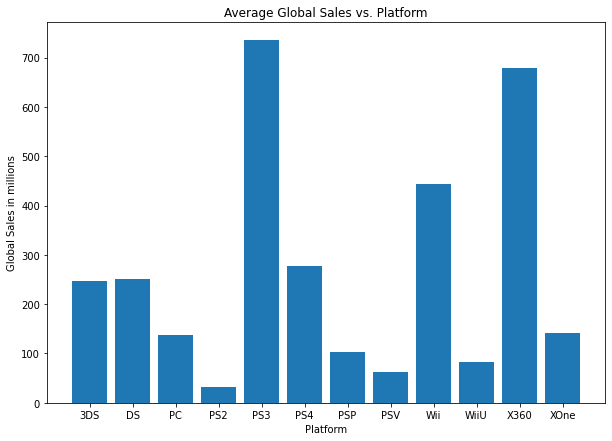

In [168]:
#Finding the most popular console (Question 1)
framePlatform = frameNew1.groupby('Platform').sum()

print(framePlatform)

plt.figure(figsize = (10,7))
plt.bar(framePlatform.index, framePlatform['Global_Sales'])

plt.xlabel('Platform')
plt.ylabel('Global Sales in millions')
plt.title('Average Global Sales vs. Platform')



In [169]:
#Checking for most popular game on the PS3
framePs3 = frameNew1.loc[frameNew1.Platform == 'PS3' ]
print(framePs3.head(5))

                               Platform    Year  ... Other_Sales Global_Sales
Name                                             ...                         
Grand Theft Auto V                  PS3  2013.0  ...        4.14        21.40
Call of Duty: Black Ops II          PS3  2012.0  ...        2.52        14.03
Call of Duty: Modern Warfare 3      PS3  2011.0  ...        1.62        13.46
Call of Duty: Black Ops             PS3  2010.0  ...        1.83        12.73
Gran Turismo 5                      PS3  2010.0  ...        2.12        10.77

[5 rows x 9 columns]


                          Platform    Year  ... Other_Sales Global_Sales
Name                                        ...                         
Wii Sports Resort              Wii  2009.0  ...        2.96        33.00
New Super Mario Bros. Wii      Wii  2009.0  ...        2.26        28.62
Wii Fit Plus                   Wii  2009.0  ...        1.79        22.00
Kinect Adventures!            X360  2010.0  ...        1.67        21.82
Grand Theft Auto V             PS3  2013.0  ...        4.14        21.40

[5 rows x 9 columns]


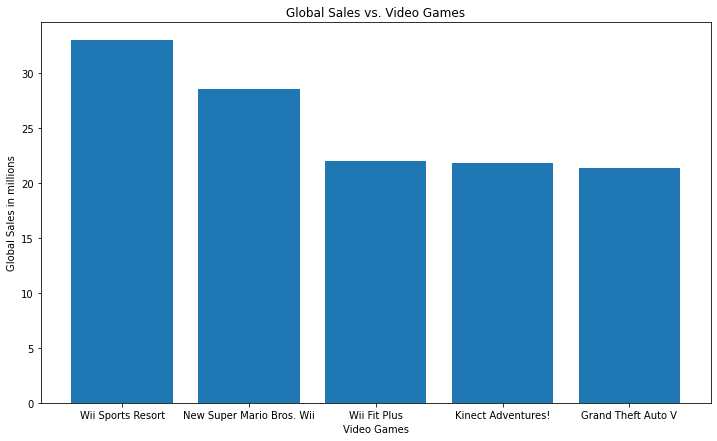

In [170]:
#Finding the top 5 Games (Question 1)
frameSort = frameNew1.sort_values('Global_Sales', ascending = False)
frameSort1 = frameSort.head(5)
print(frameSort1)

plt.figure(figsize = (12,7))
plt.bar(frameSort1.index, frameSort1['Global_Sales'])

plt.xlabel('Video Games')
plt.ylabel('Global Sales in millions')
plt.title('Global Sales vs. Video Games')
plt.show()

In [171]:
#finding the Publisher with the most games
frameNew1 = pd.DataFrame(index = data.Publisher.unique(),data = data.Publisher.value_counts())
frameNew1.columns=["Total Games"]
frameNew1.sort_values("Total Games",ascending =False).head(5)

,Total Games
Electronic Arts,1351.0
Activision,975.0
Namco Bandai Games,932.0
Ubisoft,921.0
Konami Digital Entertainment,832.0


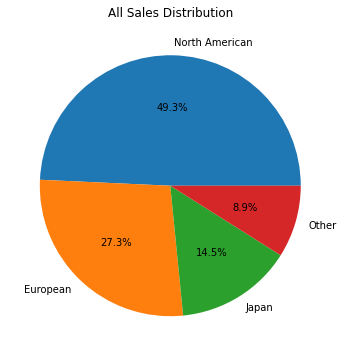

In [172]:
#Finding the Sales Distribution around the world
na = data.NA_Sales
eu = data.EU_Sales
jp = data.JP_Sales
ot = data.Other_Sales

labels = ["North American","European","Japan","Other"]
explode = [0,0,0,0]
sizes = [sum(na),sum(eu),sum(jp),sum(ot)]

plt.figure(figsize = (6,6))
plt.pie(sizes,labels = labels,explode=explode,autopct='%1.1f%%')
plt.title("All Sales Distribution")
plt.show()

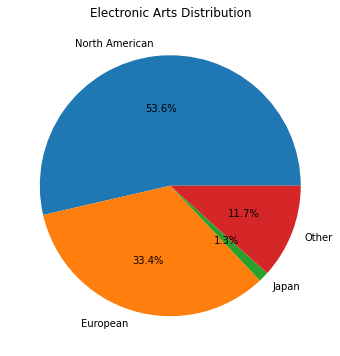

In [173]:
#Finding the Sales Distribution around the world for EA as they have the most game produced
na = data[data.Publisher == "Electronic Arts"].NA_Sales
eu = data[data.Publisher == "Electronic Arts"].EU_Sales
jp = data[data.Publisher == "Electronic Arts"].JP_Sales
ot = data[data.Publisher == "Electronic Arts"].Other_Sales

labels = ["North American","European","Japan","Other"]
explode = [0,0,0,0]
sizes = [sum(na),sum(eu),sum(jp),sum(ot)]

plt.figure(figsize = (6,6))
plt.pie(sizes,labels = labels,explode=explode,autopct='%1.1f%%')
plt.title("Electronic Arts Distribution")
plt.show()

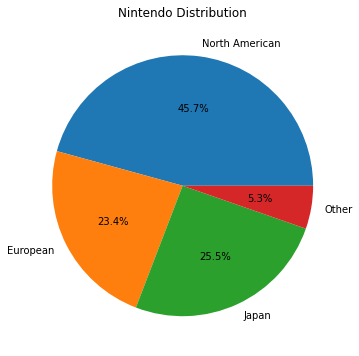

In [174]:
na = data[data.Publisher == "Nintendo"].NA_Sales
eu = data[data.Publisher == "Nintendo"].EU_Sales
jp = data[data.Publisher == "Nintendo"].JP_Sales
ot = data[data.Publisher == "Nintendo"].Other_Sales

labels = ["North American","European","Japan","Other"]
explode = [0,0,0,0]
sizes = [sum(na),sum(eu),sum(jp),sum(ot)]

plt.figure(figsize = (6,6))
plt.pie(sizes,labels = labels,explode=explode,autopct='%1.1f%%')
plt.title("Nintendo Distribution")
plt.show()

                  Rank       Year  ...  Other_Sales  Global_Sales
Genre                              ...                           
Action        14489672  3444803.0  ...        95.08        812.86
Adventure      8548522  1375877.0  ...         7.46         81.73
Fighting       1978502   502896.0  ...        12.51        114.23
Misc           6811291  1548346.0  ...        30.26        314.99
Platform       1333456   362113.0  ...        15.21        161.78
Puzzle         2086984   392007.0  ...         3.27         41.55
Racing         2674402   639592.0  ...        21.33        157.88
Role-Playing   5667518  1329979.0  ...        27.35        353.62
Shooter        3154051   977686.0  ...        63.59        532.69
Simulation     3240580   669536.0  ...         9.31        105.04
Sports         5766762  1516503.0  ...        54.49        463.32
Strategy       2540569   468575.0  ...         4.64         48.46

[12 rows x 7 columns]


Text(0.5, 1.0, 'Global Sales vs. Genre')

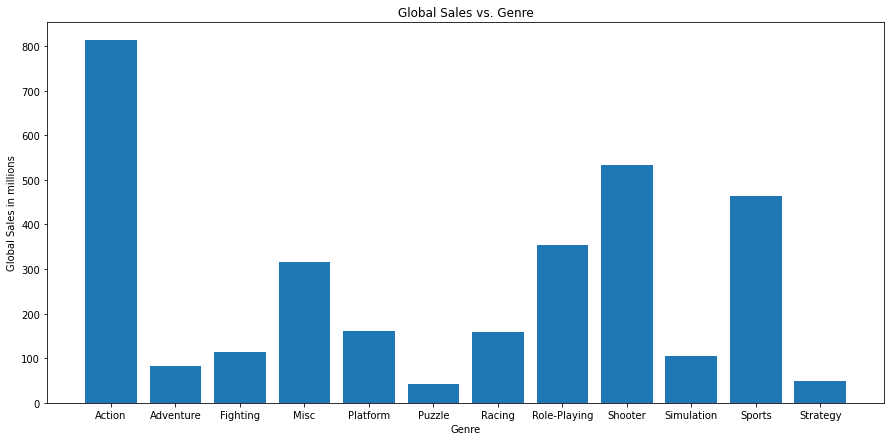

In [176]:
#finding the correlation between genre and sales
frameGenre = frameNew.groupby('Genre').sum()

print(frameGenre)

plt.figure(figsize = (15,7))
plt.bar(frameGenre.index, frameGenre['Global_Sales'])

plt.xlabel('Genre')
plt.ylabel('Global Sales in millions')
plt.title('Global Sales vs. Genre')

In [179]:
#checking which Action Games Earned the Most money
frameAction = frameNew1.loc[frameNew1.Genre == 'Action' ]
print(frameAction.head(5))

AttributeError: ignored

                  Rank       Year  ...  Other_Sales  Global_Sales
Genre                              ...                           
Action        14489672  3444803.0  ...        95.08        812.86
Adventure      8548522  1375877.0  ...         7.46         81.73
Fighting       1978502   502896.0  ...        12.51        114.23
Misc           6811291  1548346.0  ...        30.26        314.99
Platform       1333456   362113.0  ...        15.21        161.78
Puzzle         2086984   392007.0  ...         3.27         41.55
Racing         2674402   639592.0  ...        21.33        157.88
Role-Playing   5667518  1329979.0  ...        27.35        353.62
Shooter        3154051   977686.0  ...        63.59        532.69
Simulation     3240580   669536.0  ...         9.31        105.04
Sports         5766762  1516503.0  ...        54.49        463.32
Strategy       2540569   468575.0  ...         4.64         48.46

[12 rows x 7 columns]


Text(0.5, 1.0, 'Japan Sales vs. Genre')

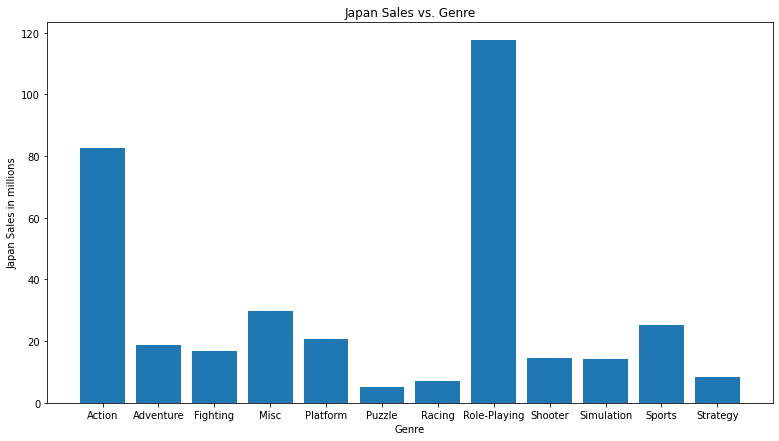

In [180]:
# Graph of  Genre against Japanese Sales
frame2 = frameNew.groupby('Genre').sum()
frame2['JP_Sales'] = frame2['JP_Sales']
print(frame2)

plt.figure(figsize = (13,7))
plt.bar(frame2.index, frame2['JP_Sales'])

plt.xlabel('Genre')
plt.ylabel('Japan Sales in millions')
plt.title('Japan Sales vs. Genre')

Text(0.5, 1.0, 'Global Sales vs. Year (2009 - 2016)')

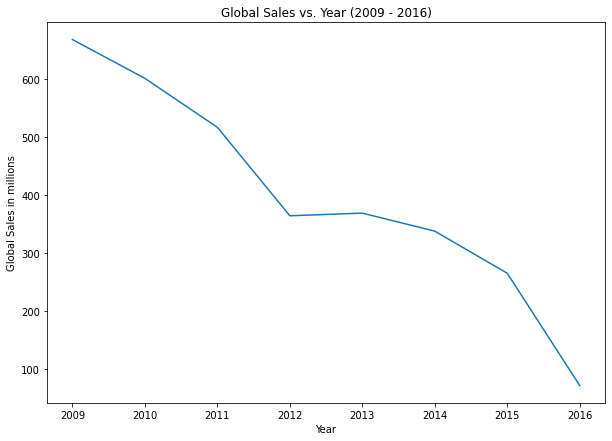

In [70]:
#Graphing the Global Trends of Sales to Answer Question 3

plt.figure(figsize = (10,7))
plt.plot(frameYear.index, frameYear['Global_Sales'])

plt.xlabel('Year')
plt.ylabel('Global Sales in millions')
plt.title('Global Sales vs. Year (2009 - 2016)')